Greenhouse gases (GHG) methane (CH4) and nitrous oxide (N2O) were monitored at two stormwater basins on Cornell University's campus from 2014-2016. We monitored during ambient dry weather conditions, and immediately following a rain event. We anticipated that "hot-moments" of high GHG emissions would occur following rain events.

Another notebook 'GHG data entry' shows how the raw data collected via Gas Chromatograph (GC) analysis was cleaned. This notebook shows some basic graphs and analysis on these data.

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
from scipy import stats
%matplotlib inline

In [85]:
#import data
data=pd.read_csv('ProcessedData\data.csv')
data_avg_date_site=pd.read_csv('ProcessedData\data_avg_date_site.csv')

In [86]:
data.head()

,Unnamed: 0,Unnamed: 0.1,ID,Date,Site,Location,VWC,Temp,Conductivity,Soil.Porosity,...,AirT,Rain,Precip,flux_N2O,r.squared.N2O,flux_CH4,r.squared.CH4,r.squared.CO2,flux_CO2,precip3
0,0,1,E1,2016-04-20,Wet Basin,Basin,85.06,9.5,2.09,0.73,...,4.4,NoRain,0.0,-3.698828,0.003789,-22.757097,0.013714,0.608706,183595.128961,0.0
1,1,2,E2,2016-04-20,Wet Basin,Basin,36.77,11.7,0.10,0.68,...,4.4,NoRain,0.0,-0.354986,0.000036,-137.966454,0.647540,0.961278,190433.497043,0.0
2,2,3,E3,2016-04-20,Wet Basin,Basin,91.24,8.2,2.39,0.89,...,4.4,NoRain,0.0,21.720546,0.073681,21.883248,0.250702,0.472880,-10212.923765,0.0
3,3,4,E4,2016-04-20,Wet Basin,Reference,32.08,11.4,0.21,0.49,...,4.4,NoRain,0.0,20.625381,0.061650,-51.622236,0.346719,0.358094,126038.438749,0.0
4,4,5,E5,2016-04-20,Wet Basin,Reference,55.43,14.2,1.26,0.56,...,4.4,NoRain,0.0,-35.320212,0.138446,62.915548,0.293559,0.969641,225931.524478,0.0


In [137]:
data.describe()

,Unnamed: 0,Unnamed: 0.1,VWC,Temp,Conductivity,Soil.Porosity,Saturation,AirT,Precip,flux_N2O,r.squared.N2O,flux_CH4,r.squared.CH4,r.squared.CO2,flux_CO2,precip3
count,340.000000,340.000000,338.000000,337.000000,338.000000,340.000000,328.000000,340.000000,340.000000,335.000000,336.000000,330.000000,328.000000,336.000000,3.350000e+02,340.000000
mean,4.270588,5.270588,39.861841,20.744519,0.494750,0.613683,0.630008,18.364804,5.352059,12.752348,0.397947,1268.427103,0.474582,0.826245,5.053908e+05,10.914529
std,2.877594,2.877594,19.098067,4.325547,0.695765,0.115128,0.220473,5.369834,7.722302,353.446558,0.318876,4464.469885,0.349130,0.237740,1.326710e+06,16.871197
min,0.000000,1.000000,18.970000,0.800000,-0.186389,0.485886,0.300000,4.400000,0.000000,-3300.613257,0.000036,-3359.142570,0.000082,0.000626,-2.891754e+06,0.000000
25%,2.000000,3.000000,26.540000,17.900000,0.100000,0.527784,0.478666,16.388889,0.000000,-10.327446,0.088035,-70.124796,0.120445,0.761569,1.474954e+05,0.000000
50%,4.000000,5.000000,32.960650,21.200000,0.190000,0.562161,0.570000,19.168333,0.000000,12.276463,0.348919,16.553734,0.451750,0.938897,2.908068e+05,2.921000
75%,7.000000,8.000000,44.766825,23.900000,0.587500,0.676937,0.751555,22.200000,8.128000,37.007936,0.669848,210.775462,0.824261,0.987848,4.906169e+05,15.748000
max,9.000000,10.000000,113.200000,30.700000,4.140000,0.890000,2.006049,26.944444,25.400000,5167.577487,1.000000,30880.803224,1.000000,1.000000,1.457042e+07,79.756000


In [87]:
data_avg_date_site.head()

,Unnamed: 0,Site,Location,Date,count,mean,std,max,min,type
0,0,Dry Basin,Basin,2016-04-20,3,15.301894,52.798109,69.103772,-36.431660,N2O_flux
1,1,Dry Basin,Basin,2016-04-27,3,46.593877,13.219106,59.131550,32.785158,N2O_flux
2,2,Dry Basin,Basin,2016-05-11,3,-20.608212,11.255629,-11.158864,-33.060858,N2O_flux
3,3,Dry Basin,Basin,2016-06-02,3,35.070078,29.780153,63.171969,3.856082,N2O_flux
4,4,Dry Basin,Basin,2016-06-20,3,-4.409587,8.524318,5.159191,-11.192190,N2O_flux


In [146]:
data_avg_date_site[['mean', 'type', 'Site']].groupby(['type','Site']).describe()

mean                                                    \
                   count         mean          std          min        25%   
type     Site                                                                
CH4_flux Dry Basin  68.0   -13.595635   191.152324 -1116.887042 -68.360194   
         Wet Basin  68.0  2230.339641  3382.032552  -207.527901 -29.895293   
N2O_flux Dry Basin  68.0    11.233201    51.058478  -298.230911  -3.812977   
         Wet Basin  68.0    11.602980   317.935604 -1684.386644   2.020282   

                                                           
                           50%          75%           max  
type     Site                                              
CH4_flux Dry Basin   -3.523738    36.399803    500.862026  
         Wet Basin  134.289057  2983.818705  10734.189013  
N2O_flux Dry Basin   15.118377    33.556028    100.726066  
         Wet Basin   10.229446    25.640310   1863.619929

Sample events and total samples:

In [88]:
#number of events during rain
data.groupby(by=['Rain'])['Date'].nunique() #counts unique dates in either the Rain or NoRain category

Rain
NoRain     18
YesRain    16
Name: Date, dtype: int64

For statistical purposes we want to know if the data is approximately normal, let's look at histograms

In [89]:
data.describe()

,Unnamed: 0,Unnamed: 0.1,VWC,Temp,Conductivity,Soil.Porosity,Saturation,AirT,Precip,flux_N2O,r.squared.N2O,flux_CH4,r.squared.CH4,r.squared.CO2,flux_CO2,precip3
count,340.000000,340.000000,338.000000,337.000000,338.000000,340.000000,328.000000,340.000000,340.000000,335.000000,336.000000,330.000000,328.000000,336.000000,3.350000e+02,340.000000
mean,4.270588,5.270588,39.861841,20.744519,0.494750,0.613683,0.630008,18.364804,5.352059,12.752348,0.397947,1268.427103,0.474582,0.826245,5.053908e+05,10.914529
std,2.877594,2.877594,19.098067,4.325547,0.695765,0.115128,0.220473,5.369834,7.722302,353.446558,0.318876,4464.469885,0.349130,0.237740,1.326710e+06,16.871197
min,0.000000,1.000000,18.970000,0.800000,-0.186389,0.485886,0.300000,4.400000,0.000000,-3300.613257,0.000036,-3359.142570,0.000082,0.000626,-2.891754e+06,0.000000
25%,2.000000,3.000000,26.540000,17.900000,0.100000,0.527784,0.478666,16.388889,0.000000,-10.327446,0.088035,-70.124796,0.120445,0.761569,1.474954e+05,0.000000
50%,4.000000,5.000000,32.960650,21.200000,0.190000,0.562161,0.570000,19.168333,0.000000,12.276463,0.348919,16.553734,0.451750,0.938897,2.908068e+05,2.921000
75%,7.000000,8.000000,44.766825,23.900000,0.587500,0.676937,0.751555,22.200000,8.128000,37.007936,0.669848,210.775462,0.824261,0.987848,4.906169e+05,15.748000
max,9.000000,10.000000,113.200000,30.700000,4.140000,0.890000,2.006049,26.944444,25.400000,5167.577487,1.000000,30880.803224,1.000000,1.000000,1.457042e+07,79.756000


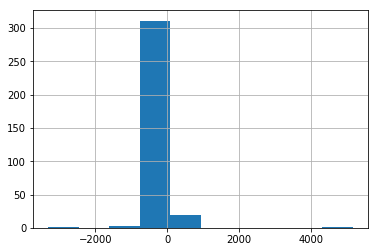

In [90]:
data['flux_N2O'].hist()

(array([  1.,   0.,   3., 311.,  19.,   0.,   0.,   0.,   0.,   1.]),
 array([-3300.61325674, -2453.79418241, -1606.97510809,  -760.15603376,
           86.66304057,   933.4821149 ,  1780.30118922,  2627.12026355,
         3473.93933788,  4320.75841221,  5167.57748653]),
 <a list of 10 Patch objects>)

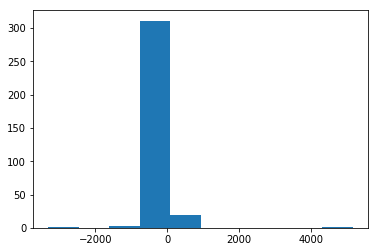

In [91]:
plt.hist(data['flux_N2O'].dropna()) #for matplot lib you must drop NAs prior to plotting

#(A[~np.isnan(A)])

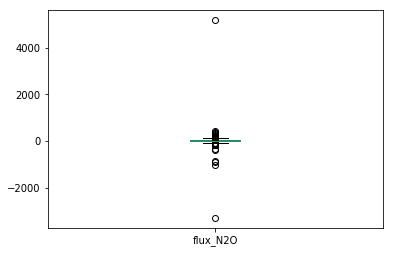

In [92]:
data[['flux_N2O']].plot(kind='box')

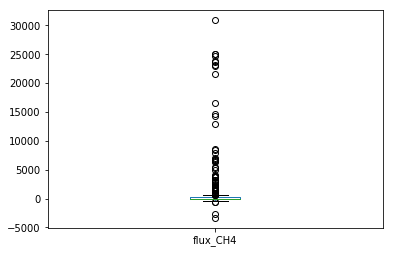

In [93]:
data[['flux_CH4']].plot(kind='box')

#1. Are basins a bigger GHG source than reference grasses?
paired t-test for each Site comparing basin vs. reference (paired at each sample timepoint). compares average emissions from each basin vs avg emissions from reference site.

In paired samples, only the difference between the pairs must be normal (not the underlying data itself).


In [94]:
data_avg_date_site_Wet=data_avg_date_site[data_avg_date_site['Site']=='Wet Basin']#separate by site
data_avg_date_site_Wet_N2O=data_avg_date_site_Wet[data_avg_date_site_Wet.type=='N2O_flux']
data_avg_date_site_Wet_CH4=data_avg_date_site_Wet[data_avg_date_site_Wet.type=='CH4_flux']

In [96]:
diffwet_N2O=[]

for i in data_avg_date_site_Wet_N2O.Date:
    date1=i
    N2O_date=data_avg_date_site_Wet_N2O[data_avg_date_site_Wet_N2O['Date']== date1]
    diffwet_N2O.append(N2O_date['mean'].iloc[0]-N2O_date['mean'].iloc[1])
    

In [97]:
N2O_date

,Unnamed: 0,Site,Location,Date,count,mean,std,max,min,type
101,101,Wet Basin,Basin,2017-10-28,3,-27.710313,123.497867,83.966393,-160.346832,N2O_flux
135,135,Wet Basin,Reference,2017-10-28,2,-56.415022,20.779003,-41.722048,-71.107996,N2O_flux


(array([ 2.,  0.,  2., 58.,  4.,  0.,  0.,  0.,  0.,  2.]),
 array([-1105.40453809,  -809.28348726,  -513.16243642,  -217.04138559,
           79.07966525,   375.20071608,   671.32176691,   967.44281775,
         1263.56386858,  1559.68491941,  1855.80597025]),
 <a list of 10 Patch objects>)

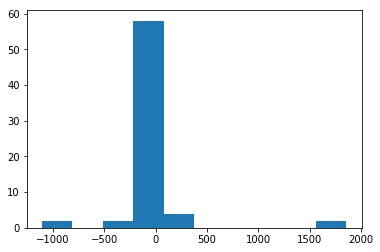

In [99]:
plt.hist(diffwet_N2O) #close enough to normal, with a few outliers

((array([-2.32106882, -1.96667152, -1.75959896, -1.60847785, -1.48711175,
         -1.38438684, -1.2944942 , -1.21399533, -1.14067729, -1.07302705,
         -1.00996155, -0.95067684, -0.89455843, -0.84112498, -0.78999163,
         -0.74084506, -0.6934262 , -0.64751782, -0.6029355 , -0.55952081,
         -0.51713622, -0.47566115, -0.43498882, -0.39502386, -0.35568028,
         -0.31687988, -0.27855092, -0.240627  , -0.20304616, -0.16575001,
         -0.12868308, -0.09179218, -0.05502582, -0.01833371,  0.01833371,
          0.05502582,  0.09179218,  0.12868308,  0.16575001,  0.20304616,
          0.240627  ,  0.27855092,  0.31687988,  0.35568028,  0.39502386,
          0.43498882,  0.47566115,  0.51713622,  0.55952081,  0.6029355 ,
          0.64751782,  0.6934262 ,  0.74084506,  0.78999163,  0.84112498,
          0.89455843,  0.95067684,  1.00996155,  1.07302705,  1.14067729,
          1.21399533,  1.2944942 ,  1.38438684,  1.48711175,  1.60847785,
          1.75959896,  1.96667152,  2.

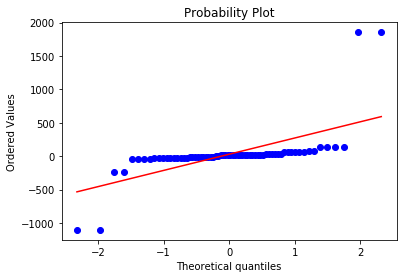

In [100]:
#stats.probplot(diffwet_N2O, plot= plt)

In [106]:
stats.ttest_rel(data_avg_date_site_Wet_N2O['mean'][data_avg_date_site_Wet_N2O['Location']=='Basin'] , data_avg_date_site_Wet_N2O['mean'][data_avg_date_site_Wet_N2O['Location']=='Reference'])

Ttest_relResult(statistic=0.43698979904114144, pvalue=0.6649650554819232)

In [107]:
#t test for wet basin methane CH4 emissions
stats.ttest_rel(data_avg_date_site_Wet_CH4['mean'][data_avg_date_site_Wet_CH4['Location']=='Basin'] , data_avg_date_site_Wet_CH4['mean'][data_avg_date_site_Wet_CH4['Location']=='Reference'])


Ttest_relResult(statistic=6.768139129968034, pvalue=1.0250892295502424e-07)

In [110]:
#nonparametric test, wilcoxon rank sum test, simmilar to paired t-test
stats.wilcoxon(data_avg_date_site_Wet_N2O['mean'][data_avg_date_site_Wet_N2O['Location']=='Basin'] , data_avg_date_site_Wet_N2O['mean'][data_avg_date_site_Wet_N2O['Location']=='Reference'])
#same thing, not significant for N2O

WilcoxonResult(statistic=237.0, pvalue=0.30097763353400153)

Does the Wet Basin produce more GHG emissions than the Dry Basin?
Use paired t-tests, because these were sampled at the same date for each site

In [121]:
data_avg_date_basin_CH4=data_avg_date_site[(data_avg_date_site['type']=='CH4_flux') & (data_avg_date_site['Location']=='Basin')]
stats.ttest_rel(data_avg_date_basin_CH4['mean'][data_avg_date_basin_CH4['Site']=='Wet Basin'] , data_avg_date_basin_CH4['mean'][data_avg_date_basin_CH4['Site']=='Dry Basin'])

Ttest_relResult(statistic=6.881001210070227, pvalue=7.401646776699464e-08)

The small p-value (<0.001) suggests that there are significant differences between the Wet and Dry Basin for Methane (CH4) emissions

In [124]:
data_avg_date_basin_N2O=data_avg_date_site[(data_avg_date_site['type']=='N2O_flux') & (data_avg_date_site['Location']=='Basin')]
stats.ttest_rel(data_avg_date_basin_N2O['mean'][data_avg_date_basin_N2O['Site']=='Wet Basin'] , data_avg_date_basin_N2O['mean'][data_avg_date_basin_N2O['Site']=='Dry Basin'])

Ttest_relResult(statistic=0.16485750264392351, pvalue=0.8700618652627636)

This large p-value, 0.87, suggests there is NO differnce between N2O emissions for the Dry and Wet basins.

In [147]:
#try to do the same thing, testing diffrences between sites with group by clause
data_avg_date_basin=data_avg_date_site[data_avg_date_site['Location']=="Basin"]
data_avg_date_basin.groupby('type').apply(lambda df: stats.ttest_rel(df['mean'][df['Site']=='Wet Basin'] , df['mean'][df['Site']=='Dry Basin']))

type
CH4_flux    (6.881001210070227, 7.401646776699464e-08)
N2O_flux     (0.16485750264392351, 0.8700618652627636)
dtype: object